<a href="https://colab.research.google.com/github/2303A52110/EXPAIC-40/blob/main/Practical-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:1**

Equation of the model: y = 10.00 + 5.00x
Slope interpretation: For each additional TV ad, sales increase by 5.00 cars.
Intercept interpretation: With no ads, sales are expected to be 10.00 cars.
Predicted sales for 10 TV ads: 60.00 cars


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


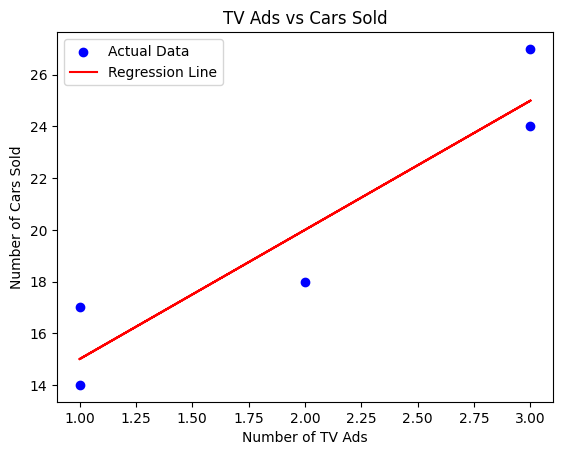

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

file_path = "Car_Sales.xlsx"
df = pd.read_excel(file_path)

X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Equation of the model: y = {intercept:.2f} + {slope:.2f}x")
print(f"Slope interpretation: For each additional TV ad, sales increase by {slope:.2f} cars.")
print(f"Intercept interpretation: With no ads, sales are expected to be {intercept:.2f} cars.")

pred_10_ads = model.predict(np.array([[10]]))[0]
print(f"Predicted sales for 10 TV ads: {pred_10_ads:.2f} cars")

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Number of TV Ads")
plt.ylabel("Number of Cars Sold")
plt.title("TV Ads vs Cars Sold")
plt.legend()
plt.show()

**Problem statement:2**

Equation of the model: Test Score = 20.00 + (0.50 * IQ) + (0.50 * Study Hours)
Coefficient for IQ: 0.50 (Change in test score per IQ point)
Coefficient for Study Hours: 0.50 (Change in test score per study hour)
Intercept: 20.00 (Baseline test score when IQ and study hours are zero)
Predicted Test Score for IQ=95 and 25 Study Hours: 80.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


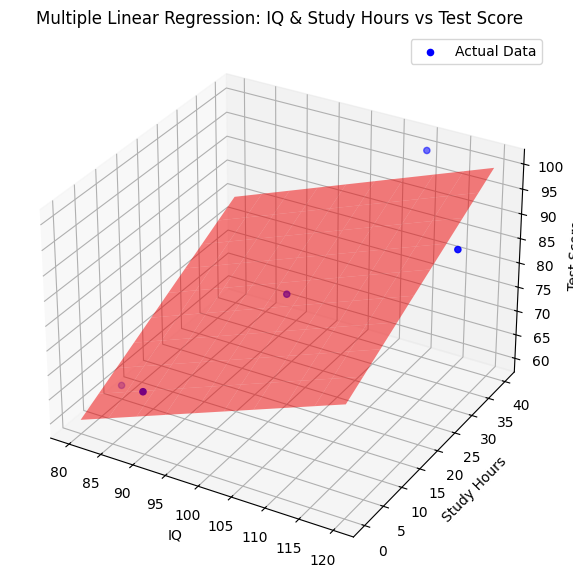

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Dataset containing IQ, Study Hours, and Test Score
data = {
    'IQ': [110, 120, 100, 90, 80],
    'StudyHours': [40, 30, 20, 0, 10],
    'TestScore': [100, 90, 80, 70, 60]
}

df = pd.DataFrame(data)

# Independent variables
X = df[['IQ', 'StudyHours']]

# Dependent variable
y = df['TestScore']

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

print(f"Equation of the model: Test Score = {intercept:.2f} + ({coefficients[0]:.2f} * IQ) + ({coefficients[1]:.2f} * Study Hours)")
print(f"Coefficient for IQ: {coefficients[0]:.2f} (Change in test score per IQ point)")
print(f"Coefficient for Study Hours: {coefficients[1]:.2f} (Change in test score per study hour)")
print(f"Intercept: {intercept:.2f} (Baseline test score when IQ and study hours are zero)")

# Prediction for a student with IQ=95 and StudyHours=25
test_input = np.array([[95, 25]])
predicted_score = model.predict(test_input)[0]
print(f"Predicted Test Score for IQ=95 and 25 Study Hours: {predicted_score:.2f}")

# 3D plot of data points and regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(df['IQ'], df['StudyHours'], y, color='blue', label='Actual Data')

# Create a grid of values for IQ and StudyHours to plot the plane
iq_range = np.linspace(df['IQ'].min(), df['IQ'].max(), 10)
study_hours_range = np.linspace(df['StudyHours'].min(), df['StudyHours'].max(), 10)
iq_grid, study_hours_grid = np.meshgrid(iq_range, study_hours_range)
test_score_grid = (intercept
                   + coefficients[0] * iq_grid
                   + coefficients[1] * study_hours_grid)

# Plot the regression plane
ax.plot_surface(iq_grid, study_hours_grid, test_score_grid, color='red', alpha=0.5)

ax.set_xlabel('IQ')
ax.set_ylabel('Study Hours')
ax.set_zlabel('Test Score')
ax.set_title('Multiple Linear Regression: IQ & Study Hours vs Test Score')
ax.legend()
plt.show()

**Problem statement:3**

Equation of the model: Salary = 25792.20 + 9449.96 * YearsExperience
Slope interpretation: For each additional year of experience, salary increases by 9449.96.
Intercept interpretation: Predicted salary for someone with 0 years of experience is 25792.20.
Predicted Salary for 3.5 years of experience: 58867.07
Predicted Salary for 7 years of experience: 91941.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


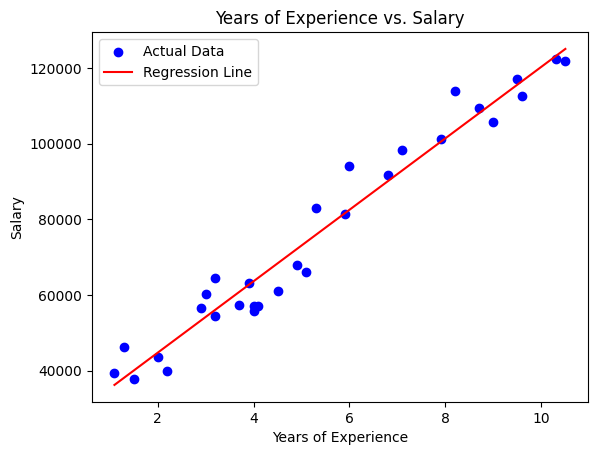

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dataset: YearsExperience and Salary (30 instances)
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7,
                        3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6,
                        6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
               63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940,
               91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}

df = pd.DataFrame(data)

# Independent variable (X) and dependent variable (y)
X = df[['YearsExperience']]
y = df['Salary']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Equation of the model: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")
print(f"Slope interpretation: For each additional year of experience, salary increases by {slope:.2f}.")
print(f"Intercept interpretation: Predicted salary for someone with 0 years of experience is {intercept:.2f}.")

# Predictions for given experience values
pred_3_5 = model.predict(np.array([[3.5]]))[0]
pred_7 = model.predict(np.array([[7]]))[0]

print(f"Predicted Salary for 3.5 years of experience: {pred_3_5:.2f}")
print(f"Predicted Salary for 7 years of experience: {pred_7:.2f}")

# Optional: Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.legend()
plt.show()

**Problem statement:4**

Equation: Sales = 993.92 + 8.22*Intelligence + 49.71*Extroversion
Interpretation: Intelligence -> 8.22, Extroversion -> 49.71
Prediction for Intelligence=100, Extroversion=25: 3058.63
Prediction for Intelligence=120, Extroversion=18: 2875.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


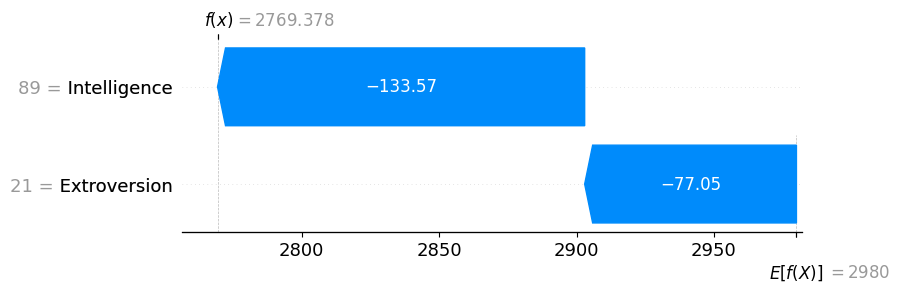

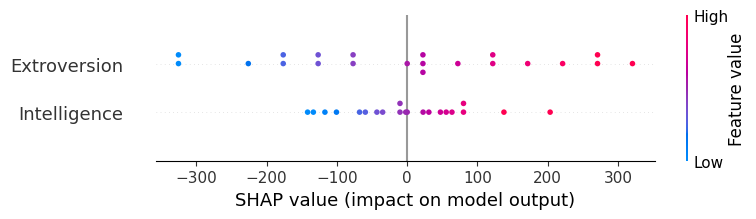

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# Load dataset
file_path = "Int_Ext.xlsx"
df = pd.read_excel(file_path)

# Keep relevant columns
df_clean = df[['Int', 'Ext', 'sal']].dropna()
df_clean.columns = ['Intelligence', 'Extroversion', 'Sales']

# Independent and dependent variables
X = df_clean[['Intelligence', 'Extroversion']]
y = df_clean['Sales']

# Fit the multiple linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

# Coefficients
intercept = mlr_model.intercept_
coef_intelligence = mlr_model.coef_[0]
coef_extroversion = mlr_model.coef_[1]

print(f"Equation: Sales = {intercept:.2f} + {coef_intelligence:.2f}*Intelligence + {coef_extroversion:.2f}*Extroversion")
print(f"Interpretation: Intelligence -> {coef_intelligence:.2f}, Extroversion -> {coef_extroversion:.2f}")

# Predictions
pred_1 = mlr_model.predict(np.array([[100, 25]]))[0]
pred_2 = mlr_model.predict(np.array([[120, 18]]))[0]

print(f"Prediction for Intelligence=100, Extroversion=25: {pred_1:.2f}")
print(f"Prediction for Intelligence=120, Extroversion=18: {pred_2:.2f}")

# ---- SHAP Analysis ----
explainer = shap.Explainer(mlr_model, X)
shap_values = explainer(X)

# Waterfall plot for first sample
shap.plots.waterfall(shap_values[0])

# Force plot for first sample
shap.plots.force(shap_values[0])

# Summary plot showing feature impact across dataset
shap.summary_plot(shap_values, X)

**Problem statement:5**

Equation of the linear regression model:
Sales = 10.9957 + (0.1992 * Facebook) + (0.0069 * Newspaper)

Interpretation:
- Coefficient for Facebook: For each additional $1000 spent on Facebook ads, sales increase by approximately 0.1992 thousand units, holding Newspaper spending constant.
- Coefficient for Newspaper: For each additional $1000 spent on Newspaper ads, sales increase by approximately 0.0069 thousand units, holding Facebook spending constant.
- Intercept: The expected baseline sales (in thousands) when spending is zero on both Facebook and Newspaper ads.

Predicted sales for Facebook = 50 and Newspaper = 70: 21.4430 thousand units
Predicted sales for Facebook = 25 and Newspaper = 30: 16.1847 thousand units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


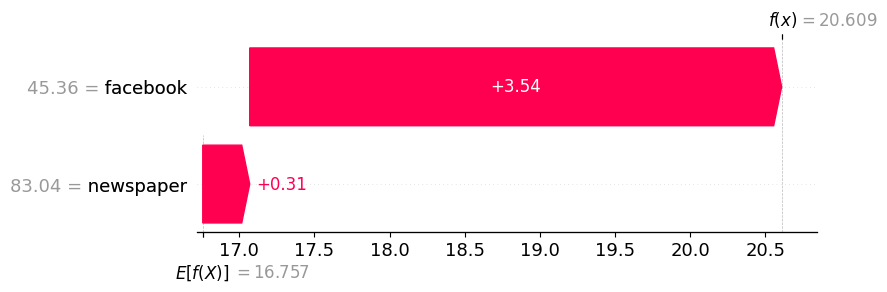

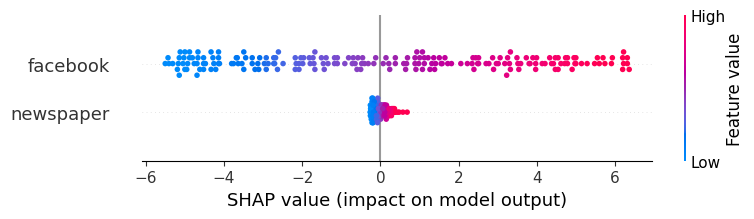

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import shap

# Load dataset from Excel file (replace 'Marketing_Dataset.xlsx' with your file path)
df = pd.read_excel('Marketing_Dataset.xlsx', sheet_name='Sheet1')

# Use relevant columns
X = df[['facebook', 'newspaper']]
y = df['sales']

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model parameters
intercept = model.intercept_
coeff_facebook = model.coef_[0]
coeff_newspaper = model.coef_[1]

print("Equation of the linear regression model:")
print(f"Sales = {intercept:.4f} + ({coeff_facebook:.4f} * Facebook) + ({coeff_newspaper:.4f} * Newspaper)")

print("\nInterpretation:")
print(f"- Coefficient for Facebook: For each additional $1000 spent on Facebook ads, sales increase by approximately {coeff_facebook:.4f} thousand units, holding Newspaper spending constant.")
print(f"- Coefficient for Newspaper: For each additional $1000 spent on Newspaper ads, sales increase by approximately {coeff_newspaper:.4f} thousand units, holding Facebook spending constant.")
print(f"- Intercept: The expected baseline sales (in thousands) when spending is zero on both Facebook and Newspaper ads.")

# Make predictions for specified ad spending
pred1 = model.predict(np.array([[50, 70]]))[0]
pred2 = model.predict(np.array([[25, 30]]))[0]

print(f"\nPredicted sales for Facebook = 50 and Newspaper = 70: {pred1:.4f} thousand units")
print(f"Predicted sales for Facebook = 25 and Newspaper = 30: {pred2:.4f} thousand units")

# SHAP Explainability (requires 'shap' package and graphical environment)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP waterfall plot for the first prediction
shap.plots.waterfall(shap_values[0])
plt.show()

# SHAP force plot for all data points
shap.plots.force(shap_values)
plt.show()

# SHAP summary plot to visualize overall feature importance
shap.summary_plot(shap_values, X)